In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=415c8e104686ee9e0aa52a6602f820eace4434d3ed75ac03956ec113

In [ ]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight, compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           4889        120  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          11444        217  1.0              
juledz/heart-attack-prediction                                     Heart Attack Prediction                              8KB  2024-01-19 16:11:46           1480         38  1.0              
joebeachcapital/57651-spotify-songs               

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [ ]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


Si creano dieci sottoinsiemi di train-test sempre uguali

In [ ]:
skf = StratifiedKFold(n_splits=10)
cross_validation_13 = skf.get_n_splits(train_13, y_train_13)
cross_validation_22 = skf.get_n_splits(train_22, y_train_22)

Si valuta l'efficacia dell'implementazione standard della Support Vector Classification

In [ ]:
nu_svc = NuSVC()
scores = cross_val_score(nu_svc, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza default Nu Support Vector Classification 13 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default Nu Support Vector Classification  13: ")
print(scores.mean())

scores = cross_val_score(nu_svc, train_22, y_train_22, cv=cross_validation_22)
print("\nAccuratezza default Nu Support Vector Classification 22 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default Nu Support Vector Classification 22: ")
print(scores.mean())

Accuratezza default Nu Support Vector Classification 13 per ogni singolo sottoinsieme di training: 
[0.78390805 0.76321839 0.76551724 0.78020713 0.76064442 0.80667434
 0.80437284 0.79746835 0.81012658 0.79401611]

Accuratezza media default Nu Support Vector Classification  13: 
0.7866153459518802

Accuratezza default Nu Support Vector Classification 22 per ogni singolo sottoinsieme di training: 
[0.78275862 0.76321839 0.76551724 0.77905639 0.76064442 0.80667434
 0.80437284 0.79746835 0.81127733 0.79401611]

Accuratezza media default Nu Support Vector Classification 22: 
0.7865004034231446


In [ ]:
svc_poly = SVC(kernel='poly')
scores_poly_13 = cross_val_score(svc_poly, train_13, y_train_13, cv=cross_validation_13)
scores_poly_22 = cross_val_score(svc_poly, train_22, y_train_22, cv=cross_validation_22)

svc_rbf = NuSVC(kernel='rbf')
scores_rbf_13 = cross_val_score(svc_rbf, train_13, y_train_13, cv=cross_validation_13)
scores_rbf_22 = cross_val_score(svc_rbf, train_22, y_train_22, cv=cross_validation_22)

svc_sigmoid = NuSVC(kernel='sigmoid')
scores_sigmoid_13 = cross_val_score(svc_sigmoid, train_13, y_train_13, cv=cross_validation_13)
scores_sigmoid_22 = cross_val_score(svc_sigmoid, train_22, y_train_22, cv=cross_validation_22)

In [ ]:
columns = ['Kernel', 'Score_13', 'Score_22']

data = [['poly', scores_poly_13.mean(), scores_poly_22.mean()],
        ['rbf', scores_rbf_13.mean(), scores_rbf_22.mean()],
        ['sigmoid', scores_sigmoid_13.mean(), scores_sigmoid_22.mean()]]

kernel_score = pd.DataFrame(data=data, columns=columns)
kernel_score

,Kernel,Score_13,Score_22
0,poly,0.684849,0.684274
1,rbf,0.786615,0.786500
2,sigmoid,0.514663,0.518919


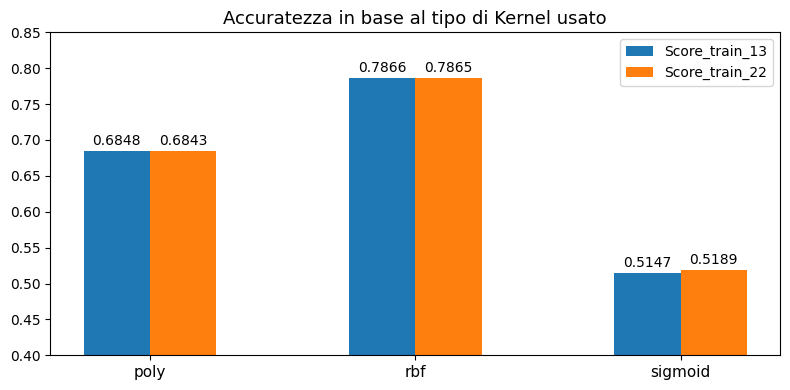

In [ ]:
kernels = ('poly', 'rbf', 'sigmoid')
scores = {
    'Score_train_13': (scores_poly_13.mean(), scores_rbf_13.mean(), scores_sigmoid_13.mean()),
    'Score_train_22': (scores_poly_22.mean(), scores_rbf_22.mean(), scores_sigmoid_22.mean())
}

x = np.arange(len(kernels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,4))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, np.round(score, 4), width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Accuratezza in base al tipo di Kernel usato', fontsize=13)
ax.set_ylim(0.4, 0.85)
ax.set_xticks(x + width/2, kernels, fontsize=11)
ax.legend()

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "SVC_kernel.png")):
  plt.savefig(IMAGE_PATH + "SVC_kernel.png", format="png")
plt.show()

Setting nu

In [ ]:
def set_nu(train, test):
  columns = ['Nu', 'Score']
  nu_score = pd.DataFrame(columns=columns)
  nu_values = np.linspace(0.45, 0.55, 11, dtype=float)

  for nu in nu_values:
    svc = NuSVC(kernel='rbf', nu=nu)
    scores = cross_val_score(svc, train, test, cv=10)
    row = pd.DataFrame(data=[[nu, scores.mean()]], columns=columns)
    nu_score = pd.concat([nu_score, row])

  return nu_score

In [ ]:
nu_score_13 = set_nu(train_13, y_train_13)
nu_score_13

,Nu,Score
0,0.45,0.786038
0,0.46,0.787649
0,0.47,0.789489
0,0.48,0.788455
0,0.49,0.787190
0,0.50,0.786615
0,0.51,0.785465
0,0.52,0.784891
0,0.53,0.783625
0,0.54,0.782360


In [ ]:
nu_score_22 = set_nu(train_22, y_train_22)
nu_score_22

,Nu,Score
0,0.45,0.786038
0,0.46,0.787304
0,0.47,0.789835
0,0.48,0.787880
0,0.49,0.786960
0,0.50,0.786500
0,0.51,0.785580
0,0.52,0.785005
0,0.53,0.783395
0,0.54,0.782475


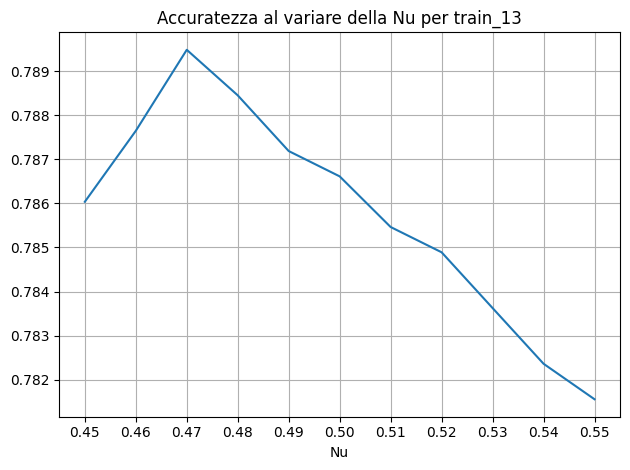

In [ ]:
fig, ax = plt.subplots()
ax.plot(nu_score_13.Nu, nu_score_13.Score)
ax.set(xlabel='Nu', title="Accuratezza al variare della Nu per train_13")
ax.set_xticks(np.linspace(0.45, 0.55, 11, dtype=float))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "SVC_nu_13.png")):
  plt.savefig(IMAGE_PATH + "SVC_nu_13.png", format="png")
plt.show()

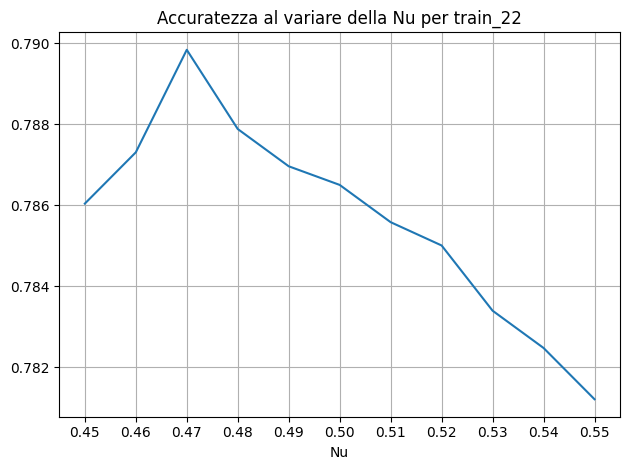

In [ ]:
fig, ax = plt.subplots()
ax.plot(nu_score_22.Nu, nu_score_22.Score)
ax.set(xlabel='Nu', title="Accuratezza al variare della Nu per train_22")
ax.set_xticks(np.linspace(0.45, 0.55, 11, dtype=float))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "SVC_nu_22.png")):
  plt.savefig(IMAGE_PATH + "SVC_nu_22.png", format="png")
plt.show()

nu migliore per train_13: 0.47

nu migliore per train_22: 0.47

Setting gamma

In [ ]:
def set_gamma(train, test, nu):
  columns = ['Gamma', 'Score']
  gamma_score = pd.DataFrame(columns=columns)
  gamma_values = ['scale','auto',0.1,0.5,1]

  for g in gamma_values:
    svc = NuSVC(kernel='rbf', nu=nu, gamma=g)
    scores = cross_val_score(svc, train, test, cv=10)
    row = pd.DataFrame(data=[[g, scores.mean()]], columns=columns)
    gamma_score = pd.concat([gamma_score, row])

  return gamma_score

In [ ]:
gamma_score_13 = set_gamma(train_13, y_train_13, 0.47)
gamma_score_13

,Gamma,Score
0,scale,0.789489
0,auto,0.490393
0,0.1,0.491198
0,0.5,0.500748
0,1,0.501323


In [ ]:
gamma_score_22 = set_gamma(train_22, y_train_22,0.47)
gamma_score_22

,Gamma,Score
0,scale,0.789835
0,auto,0.489357
0,0.1,0.491314
0,0.5,0.500748
0,1,0.501553


gamma migliore per train_13: 'scale' (default)

gamma migliore per train_22: 'scale' (default)

Setting the tolerance

In [ ]:
def set_tolerance(train, test, nu):
  columns = ['Tolerance', 'Score']
  tolerance_score = pd.DataFrame(columns=columns)
  tolerances = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

  for t in tolerances:
    svc = NuSVC(kernel='rbf', nu=nu, tol=t)
    scores = cross_val_score(svc, train, test, cv=10)
    row = pd.DataFrame(data=[[t, scores.mean()]], columns=columns)
    tolerance_score = pd.concat([tolerance_score, row])

  return tolerance_score

In [ ]:
tolerance_score_13 = set_tolerance(train_13, y_train_13, 0.47)
tolerance_score_13

,Tolerance,Score
0,0.00001,0.788569
0,0.00005,0.788684
0,0.00010,0.788914
0,0.00050,0.789374
0,0.00100,0.789489
0,0.00500,0.789029
0,0.01000,0.787879
0,0.05000,0.784889
0,0.10000,0.726668


In [ ]:
tolerance_score_22 = set_tolerance(train_22, y_train_22, 0.47)
tolerance_score_22

,Tolerance,Score
0,0.00001,0.788799
0,0.00005,0.789144
0,0.00010,0.789374
0,0.00050,0.789719
0,0.00100,0.789835
0,0.00500,0.788799
0,0.01000,0.786155
0,0.05000,0.781093
0,0.10000,0.754279


Tolerance migliore per train_13: 0.001 (default)

Tolerance migliore per train_22: 0.001 (default)

Setting cache_size

In [ ]:
def set_cache_size(train, test, nu):
  columns = ['Cache_size', 'Score']
  cache_size_score = pd.DataFrame(columns=columns)
  cache_sizes = np.linspace(100,1000,10, dtype=int)

  for cs in cache_sizes:
    svc = NuSVC(kernel='rbf', nu=nu, cache_size=cs)
    scores = cross_val_score(svc, train, test, cv=10)
    row = pd.DataFrame(data=[[cs, scores.mean()]], columns=columns)
    cache_size_score = pd.concat([cache_size_score, row])

  return cache_size_score

In [ ]:
cache_size_score_13 = set_cache_size(train_13, y_train_13, 0.47)
cache_size_score_13

,Cache_size,Score
0,100,0.789489
0,200,0.789489
0,300,0.789489
0,400,0.789489
0,500,0.789489
0,600,0.789489
0,700,0.789489
0,800,0.789489
0,900,0.789489
0,1000,0.789489


In [ ]:
cache_size_score_22 = set_cache_size(train_22, y_train_22, 0.47)
cache_size_score_22

,Cache_size,Score
0,100,0.789835
0,200,0.789835
0,300,0.789835
0,400,0.789835
0,500,0.789835
0,600,0.789835
0,700,0.789835
0,800,0.789835
0,900,0.789835
0,1000,0.789835


cache_size migliore per train_13: 200 (default)

cache_size migliore per train_22: 200 (default)

In [ ]:
svc_best_13 = NuSVC(kernel='rbf', nu=0.47)
scores = cross_val_score(svc_best_13, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di training 13: ")
print(scores)
print("\nAccuratezza media di training 13: ")
print(scores.mean())

svc_best_13.fit(train_13, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training 13: 
[0.78965517 0.77356322 0.77356322 0.78596087 0.76179517 0.80437284
 0.80207135 0.7986191  0.81242808 0.79286536]

Accuratezza media di training 13: 
0.7894894382498049


NuSVC(nu=0.47)

In [ ]:
svc_best_22 = NuSVC(kernel='rbf', nu=0.47)
scores = cross_val_score(svc_best_22, train_22, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di training 22: ")
print(scores)
print("\nAccuratezza media di training 22: ")
print(scores.mean())

svc_best_22.fit(train_22, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training 22: 
[0.78735632 0.77586207 0.77471264 0.78711162 0.76179517 0.80437284
 0.80207135 0.79976985 0.81357883 0.79171461]

Accuratezza media di training 22: 
0.7898345303757788


NuSVC(nu=0.47)

Valutazione train_13 e train_22 con aggiunta di Service_use ed Expenses

In [ ]:
#train_13

svc_14 = NuSVC(kernel='rbf', nu=0.47)
train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

scores = cross_val_score(svc_14, train_14, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

svc_14.fit(train_14, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.78965517 0.77356322 0.77356322 0.78711162 0.76179517 0.80207135
 0.80207135 0.7986191  0.81357883 0.78941312]

Accuratezza media con aggiunta di Service_use: 
0.7891442138539476


NuSVC(nu=0.47)

In [ ]:
#train_13

svc_15 = NuSVC(kernel='rbf', nu=0.47)
train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

scores = cross_val_score(svc_15, train_15, y_train_13, cv=cross_validation_13)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

svc_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.77471264 0.78390805 0.78505747 0.78365938 0.76064442 0.80552359
 0.80437284 0.79516686 0.81703107 0.78711162]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7897187942277423


NuSVC(nu=0.47)

In [ ]:
#train_22

svc_23 = NuSVC(kernel='rbf', nu=0.47)
train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

scores = cross_val_score(svc_23, train_23, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

svc_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.78735632 0.77586207 0.77471264 0.78596087 0.76179517 0.80207135
 0.80207135 0.79976985 0.81472957 0.79056387]

Accuratezza media con aggiunta di Service_use: 
0.7894893059799214


NuSVC(nu=0.47)

In [ ]:
#train_22

svc_24 = NuSVC(kernel='rbf', nu=0.47)
train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

scores = cross_val_score(svc_24, train_24, y_train_22, cv=cross_validation_22)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

svc_24.fit(train_24, y_train_22)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.77586207 0.78390805 0.78390805 0.78365938 0.76179517 0.80667434
 0.80437284 0.79631761 0.81588032 0.78941312]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7901790934222186


NuSVC(nu=0.47)

KAGGLE SUBMISSION

In [ ]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [ ]:
generateSubmission(svc_24, "test_22.csv", True, True, "SVC_6.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

100% 56.0k/56.0k [00:00<00:00, 70.6kB/s]
Successfully submitted to Spaceship Titanic

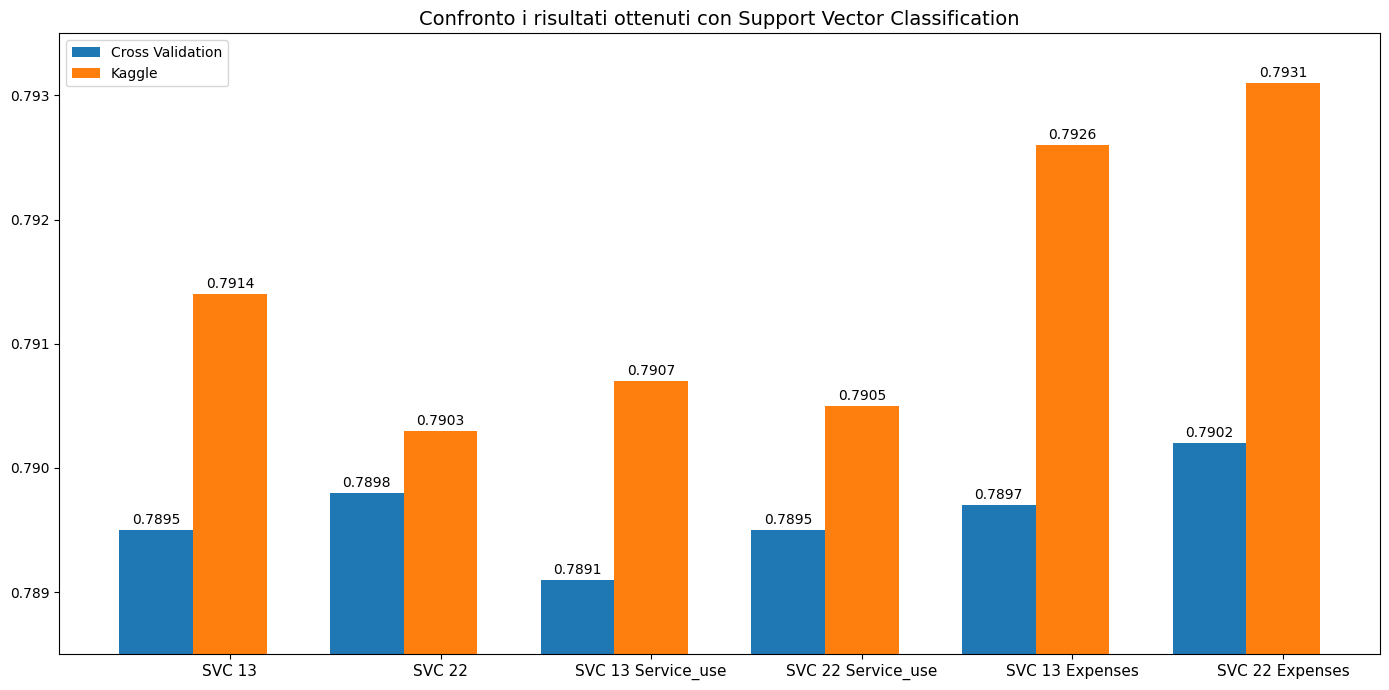

In [ ]:
classifers = ('SVC 13', 'SVC 22', 'SVC 13 Service_use', 'SVC 22 Service_use', 'SVC 13 Expenses', 'SVC 22 Expenses')
scores = {
    'Cross Validation': (0.7895 , 0.7898 , 0.7891, 0.7895 , 0.7897, 0.7902),
    'Kaggle': (0.7914, 0.7903, 0.7907, 0.7905, 0.7926, 0.7931)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti con Support Vector Classification', fontsize=14)
ax.set_ylim(0.7885, 0.7935)
ax.set_xticks(x + width, classifers, fontsize=11)
ax.legend(loc='upper left')

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "SVC_Risultati.png")):
  plt.savefig(IMAGE_PATH + "SVC_Risultati.png", format="png")
plt.show()